# SETUP

In [1]:
import numpy as np
import Structures as S
import common as C
import FreeAssigner as fa
import networkx as nx
import scipy.stats as sps
import Measured
import time

Create protein and experiment

In [2]:
start = time.time()
sequence = np.random.choice(C.DATA['mean'].index, 20, replace=True)
# spectra = ['HSQC', 'HNCACB', 'HN(CO)CACB']
spectra = C.SPECTRA.keys()
p = S.FakeProtein(sequence, spectra)
# p = S.TrueProtein(C.TESTS['bmr4391'])
e = S.SimulatedExperiment(p, spectra)
print time.time() - start

0.0830001831055


In [11]:
start = time.time()
spectra = C.SPECTRA.keys()
p = S.TrueProtein(C.TESTS['sh2'])
e = S.SimulatedExperiment(p, spectra)
print time.time() - start

114
114
6.26399993896


In [23]:
for s, value in e.measured_peaks.iteritems():
    if s == 'HSQC':
        print 'HSQC'
        continue
    n = value.shape[0]
    mask = np.random.random(n) < 0.8
    e.measured_peaks[s] = value[mask, :]

HSQC


Create assigner

In [24]:
start = time.time()
a = fa.AssignerFA(e)
print time.time() - start

creating nodes ...


100%|████████████████████████████████████████████████████████████████████████████████| 130/130 [21:20<00:00,  9.85s/it]


no layer! AtomGroupFA()
no layer! AtomGroupFA()
... created 13547 nodes
creating edges ...


100%|████████████████████████████████████████████████████████████████████████████████| 113/113 [06:08<00:00,  3.26s/it]


... created 89570 edges
1668.7750001


# FIND PATH

In [25]:
a.optimize_ilp(G=a)

...fixing edge order...
...creating variable...
...created binary variable of size 89570!
...assembling constraints
   ...path constraints...
   ...utilization constraints...
...assembling objective
... solving ...
Optimize a model with 14579 rows, 89570 columns and 868524 nonzeros
Variable types: 0 continuous, 89570 integer (89570 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-04, 5e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 3314 rows and 10695 columns
Presolve time: 2.63s
Presolved: 11265 rows, 78875 columns, 230420 nonzeros
Variable types: 0 continuous, 78875 integer (78875 binary)
Found heuristic solution: objective 1898.5150333

Root simplex log...

Iteration    Objective       Primal Inf.    Dual Inf.      Time
    9530    4.6259987e+03   4.086237e+01   0.000000e+00      5s
   13920    4.5770538e+03   3.904963e+01   0.000000e+00     10s
   17660    4.5452730e+03   2.273744e+01   0.000000e+00 

In [26]:
a.accuracy(a.path, e.true_x)

Residue 0 nan nan nan nan 	0
Residue 1 nan nan nan nan nan nan nan 	0
Residue 2 nan nan nan nan nan nan nan nan 	0
Residue 3 nan nan nan nan nan nan nan 	0
Residue 4 nan nan nan nan nan nan nan 	0
Residue 5 nan nan nan nan nan nan nan nan 	0
Residue 6 0.02 0.002 -0.01 -0.079 0.025 nan -0.18 	6
Residue 7 nan 0.055 0.001 0.004 -0.17 nan -0.036 	5
Residue 8 -0.266 0.625 -5.627 3.013 0.017 -0.33 -3.657 0.693 	2
Residue 9 nan nan nan nan nan nan nan nan 	0
Residue 10 nan 1.92 -0.222 nan -0.871 -8.031 2.232 0.772 	0
Residue 11 	0
Residue 12 nan nan nan nan nan nan nan nan 	0
Residue 13 11.002 5.276 1.65 3.027 -4.115 -2.949 2.925 -1.496 	0
Residue 14 nan nan nan nan nan nan nan nan 	0
Residue 15 7.12 -1.549 0.676 nan nan 3.603 1.069 3.668 	0
Residue 16 nan 1.012 9.138 -0.672 3.962 -0.775 -6.605 3.574 	0
Residue 17 nan nan nan nan nan nan nan nan 	0
Residue 18 1.417 2.552 -0.091 5.471 2.514 2.546 2.174 3.864 	1
Residue 19 nan nan nan nan nan nan nan nan 	0
Residue 20 0.131 -0.002 0.032 0.161 -

In [20]:
correct = [0, 0, 0, 0, 0, 2, 5, 6, 8, 8, 8, 0, 8, 8, 8, 8, 8, 7, 8, 8, 7, 6, 8, 0, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 6, 8, 8, 8, 0, 6, 8, 8, 6, 0, 8, 8, 7, 7, 8, 8, 0, 8, 8, 0, 7, 2, 0, 0, 0, 0, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 6, 7, 7, 0, 0, 0, 0, 8, 8, 7, 8, 8, 7, 6, 8, 8, 8, 8, 0, 8, 7, 8, 8, 8, 7, 7, 0, 8, 8, 8, 8, 7, 0, 8, 7, 0, 1, 0, 0]
possibl = [0, 0, 0, 0, 0, 2, 5, 6, 8, 8, 8, 0, 8, 8, 8, 8, 8, 7, 8, 8, 7, 6, 8, 0, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 6, 8, 8, 8, 0, 6, 8, 8, 6, 0, 8, 8, 7, 7, 8, 8, 0, 8, 8, 0, 7, 6, 0, 0, 8, 0, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 6, 7, 7, 0, 0, 8, 0, 8, 8, 7, 8, 8, 7, 6, 8, 8, 8, 8, 0, 8, 7, 8, 8, 8, 7, 7, 0, 8, 8, 8, 8, 7, 0, 8, 7, 0, 8, 8, 0]

In [21]:
np.sum(correct) / float(np.sum(possibl))

0.9496402877697842

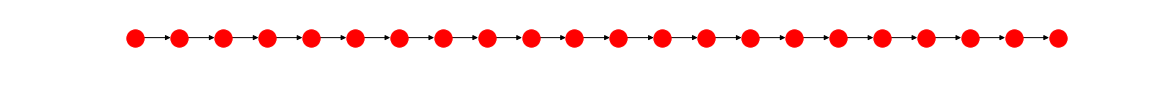

In [5]:
%matplotlib inline
a.draw(a.solution_path)

In [6]:
nodes = sorted(list(a.solution_path.nodes()), key=lambda node: node.residue)
print len(nodes)

22


In [7]:
path = []
residues = set()
for node in nodes[2:]:
    if node.residue not in residues:
        path.append(node)
        residues.add(node.residue)

In [8]:
for node1, node2 in zip(path[:-1], path[1:]):
    print node1.edge_score(node2), node1.node_score()

35.50108097607952 35.50108097607952
0.0 0.0
50.52050454447451 30.278691211921053
45.40191885065234 38.80546299680121
45.655212129892796 39.949762624076826
47.91942506506728 40.904157056611794
44.57853986175121 37.88558590508394
43.486588096281565 37.65232884665981
38.675392547426924 33.63810343973252
48.51620155707423 40.535337351077395
16.667034183227727 -3.6966431378924067
51.23189725259076 43.7265764007624
44.412383857450685 37.405968710781764
47.116667098989886 42.44528877400754
39.24510893711062 37.68936012449973
44.01325171760971 36.06999664182193
41.6855627741066 34.825543256637175
50.143343702098925 42.09352773216765
46.0943459528902 38.11203479672182


In [9]:
a.accuracy(path, e.true_x)

Residue 0 	0


C:\Users\sylen\Anaconda2\lib\site-packages\numpy\core\fromnumeric.py:52: RuntimeWarning: invalid value encountered in rint
  return getattr(obj, method)(*args, **kwds)


Residue 1 nan nan 0.295 -3.493 nan 5.963 0.191 nan 	1
Residue 2 -0.153 nan -0.064 0.015 0.028 0.0 0.195 -0.005 	7
Residue 3 0.033 -0.047 -0.001 -0.058 -0.025 -0.04 -0.083 -0.019 	8
Residue 4 -0.019 0.012 0.001 0.111 -0.012 0.083 -0.019 0.187 	8
Residue 5 -0.176 -0.016 0.007 0.0 0.003 0.059 -0.05 0.033 	8
Residue 6 -0.041 -0.023 0.013 -0.028 0.001 -0.003 0.128 0.074 	8
Residue 7 -0.002 -0.006 0.028 0.034 0.046 -0.019 0.053 -0.086 	8
Residue 8 -0.146 -0.002 -0.091 0.005 -0.043 -0.036 0.153 0.085 	8
Residue 9 nan nan nan nan nan nan nan nan 	0
Residue 10 0.021 -0.043 0.0 0.062 -0.055 0.017 0.054 -0.045 	8
Residue 11 -0.042 -0.05 0.041 0.031 -0.116 0.036 -0.031 0.002 	8
Residue 12 -0.026 -0.087 0.109 -0.027 -0.015 0.115 0.0 -0.001 	8
Residue 13 -0.045 0.127 -0.023 0.05 -0.053 0.116 -0.083 0.001 	8
Residue 14 -0.002 0.017 0.016 -0.009 -0.04 0.024 -0.072 -0.002 	8
Residue 15 -0.019 0.117 0.057 0.065 0.08 -0.045 -0.017 0.003 	8
Residue 16 0.011 -0.073 0.043 0.125 0.131 -0.018 0.0 0.075 	8
Res